# Assignment: Unsupervised Machine Learning \ Clustering

## Part 1: Partitional Clustering

In this assignment you will experience with partitional, mixture model and hierarchical clustering. The analyses are made on real datasets under the circumstances of real life challenges in unsupervised machine learning.

In [3]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Read blood test results as an EMR from an Excel file

In [7]:
# Open the file
xlsx = pd.ExcelFile("EMR-Blood.xlsx")

# Get the first sheet as an object
sheet1 = xlsx.parse(0)

# Set the Key column as the index
sheet1.set_index("Key", inplace=True)

# Show first 10 rows
sheet1[:10]

,Na,K,ALT,AST,WBC,RBC,Hgb,Hct
Key,,,,,,,,
1,141,4.65,26.33,26.09,10.25,4.06,17.6,36.3
2,140,4.96,20.67,26.46,6.13,3.80,13.2,35.6
3,136,3.66,15.72,19.95,5.86,4.26,16.2,43.7
4,136,4.74,17.16,24.39,10.80,4.83,16.1,49.8
5,140,4.74,17.12,22.90,6.59,4.05,12.6,39.1
6,146,3.98,24.43,22.87,4.53,4.04,17.9,47.3
7,144,5.29,15.98,18.14,10.12,3.96,17.2,47.9
8,138,4.57,17.44,21.88,4.66,4.91,13.7,41.5
9,144,3.96,21.43,28.54,4.57,4.72,15.1,47.6


### Blood Test Abbreviations
- Na == Sodium
- K == Potassium
- ALT == Alanine transaminase
- AST == Aspartate transaminase
- WBC == White blood cells
- RBC == Red blood cells
- Hgb == Hemoglobin
- Hct == Hematocrit

### Use K-Means to create clusters according to variables of uniform distribution

In [8]:
# Retrieve the K, WBC and Hgb column values as the dataset to cluster
variables1 = ["K","WBC","Hgb"]
EMR3d1 = sheet1.loc[:, variables1].values

# Run the K-Means algorithm, assuming the correct number of clusters is 5
y_pred_KMeans1 = KMeans(n_clusters=5).fit_predict(EMR3d1)

### Make a 3D chart

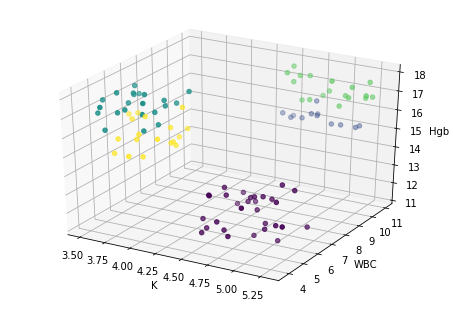

In [9]:
def make_chart (chart_data, y_pred, labels):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.scatter(chart_data[:,0], chart_data[:,1], chart_data[:,2], c=y_pred)

make_chart(EMR3d1, y_pred_KMeans1, variables1)

## Challenge 211

Humans can clearly spot 3 clusters, however, for machines it's much harder to "learn" that. In the above implementation, K-Means was given the value of 5 as K.
Your mission, should you choose to accept it, is to develop a **generic** mechanism for finding the most reasonable number of clusters by:
1. Iterating K over a reasonable range, which should be derived from the number of points
2. Harnessing one of the segmentation algorithms we learned as a heuristic to choose K
3. Showing the final clusters in a 3D chart

In [7]:
EMR3d1.shape

(100, 3)

In [10]:
# Add your code for Challenge 211 after this line, and keep it in this cell.

Sum_of_squared_distances = []
K = range(1,99)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(EMR3d1)
    Sum_of_squared_distances.append(km.inertia_)


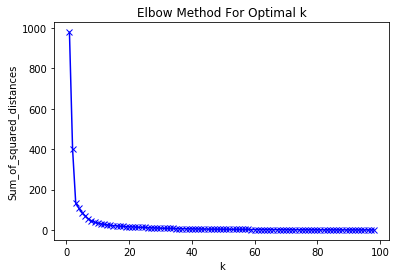

In [6]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## Part 2: Mixture Models Clustering

### Use K-Means to create clusters according to variables of both uniform and Gaussian distributions

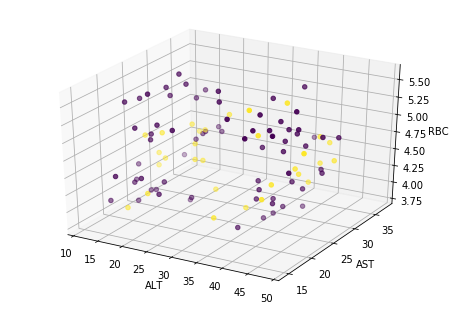

In [12]:
# Retrieve the ALT, AST and RBC column values as the dataset to cluster
variables2 = ["ALT","AST","RBC"]
EMR3d2 = sheet1.loc[:, variables2].values

# Run the K-Means algorithm, assuming the correct number of clusters is 2
y_pred_KMeans2 = KMeans(n_clusters=2).fit_predict(EMR3d1)

# Make a 3D chart
make_chart(EMR3d2, y_pred_KMeans2, variables2)

## Challenge 212
Scientists have found that in this population of patients, RBC distribution is uniform, AST distribution is a Gaussian and ALT distribution is a mixture of two Gaussians. Clearly, even by giving K-Means the correct K, the algorithm got to the wrong conclusion. This separation is "technically" correct, but lacks some underlying understanding of the natural phenomena. Your mission, should you choose to accept it, is to:
1. Apply the GMM algorithm on this data
2. Make any required (but reasonable) adjustments in order to find the true clusters
3. Show the final clusters in a 3D chart

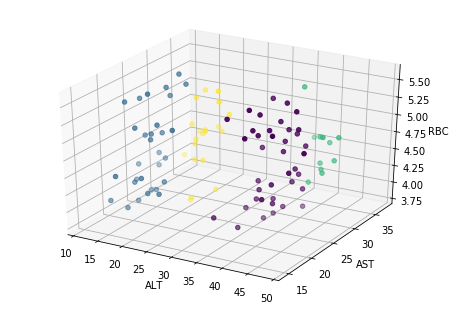

In [15]:
# Add your code for Challenge 212 after this line, and keep it in this cell.
from sklearn.mixture import GaussianMixture
y_pred_KMeans2 = GaussianMixture(n_components=4, covariance_type='full').fit(EMR3d2).predict(EMR3d2)

make_chart(EMR3d2, y_pred_KMeans2, variables2)



## Part 3: Hierarchical Clustering
(Practice material by Etam Benger)

### Different ways to calculate the distance between clusters can yield strikingly different results

In [11]:
# Labels
l = ['A', 'B', 'C', 'D', 'E', 'F']

# Distance matrix
# (Note that it must be symmetrical and its diagonal is always 0)
d = np.array([[0, 1, 3, 3, 3, 4],
              [1, 0, 4, 2, 3, 2],
              [3, 4, 0, 3, 2, 5],
              [3, 2, 3, 0, 2, 4],
              [3, 3, 2, 2, 0, 5],
              [4, 2, 5, 4, 5, 0]])

In [12]:
# The hierarchy.linkage function uses a condensed distance matrix,
# which is a flattened vector of the upper right triangle of the matrix:
# (Caution! If you use the distance matrix as is, you will get erroneous
# results -- in that case the algorithm will assume that each row is a
# vector that represents the respective point, and will calculate the
# euclidean distance between those vectors, which is absolute nonsense.)
squareform(d)

array([1, 3, 3, 3, 4, 4, 2, 3, 2, 3, 2, 5, 2, 4, 5])

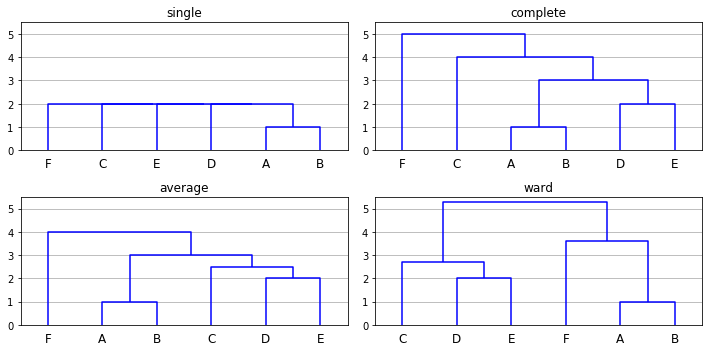

In [0]:
# Please read the documentation here:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
#
# As you'll see below, the different methods of linkage may produce very different structures
# and, consequently, very different clusters. Try to understand why (look at the distance matrix
# and follow the formulas in the documentation).
# Sometimes the characteristics of the problem suggest what method is more natural to use than
# the others. This is especially true with respect to the complete (= farthest point) and single
# (= nearest point) methods. Other times the 'correct' method to use is not obvious at all, and
# it requires inspecting the results and the data thoroughly. The average method usually works
# well, however.

methods = ['single', 'complete', 'average', 'ward']  # There are other methods as well, see documentation

plt.figure(figsize=(10, 5))

for i, method in enumerate(methods):
    plt.subplot(2, 2, i+1)
    plt.title(method)
    
    ############# This is the relevant part: #############
    #                                                    #
    lnk = hierarchy.linkage(squareform(d), method)
    hierarchy.dendrogram(lnk, labels=l, color_threshold=0)
    #                                                    #
    ######################################################
    
    plt.ylim(0, 5.5)
    plt.grid(axis='y')

plt.tight_layout()

### Altering the order in which clusters are joined can also yield strikingly different results

In [5]:
# Labels
l = ['A', 'B', 'C', 'D', 'E']

# Distance matrices
epsilon = 10**-16
a, b = 1 + epsilon, 1 - epsilon

d1 = np.array([[0, 1, a, 5, 5],
               [1, 0, 3, 5, 5],
               [a, 3, 0, 3, b],
               [5, 5, 3, 0, 1],
               [5, 5, b, 1, 0]])

d2 = np.array([[0, 1, b, 5, 5],
               [1, 0, 3, 5, 5],
               [b, 3, 0, 3, a],
               [5, 5, 3, 0, 1],
               [5, 5, a, 1, 0]])

In [6]:
# The Frobenius distance between the matrices is negligible
np.sqrt(np.sum((d1-d2)**2))

2.2204460492503131e-16

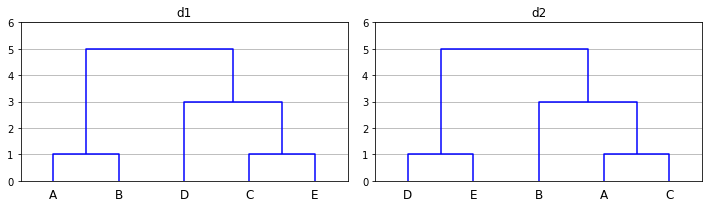

In [7]:
# But the resulting clusters are very different!

plt.figure(figsize=(10, 3))

for i, d in enumerate([d1, d2]):
    plt.subplot(1, 2, i+1)
    plt.title('d%s' % (i+1,))

    lnk = hierarchy.linkage(squareform(d), 'complete') # You can experiment with the different methods ('single', 'complete', 'average', 'ward')
    hierarchy.dendrogram(lnk, labels=l, color_threshold=0)

    plt.ylim(0, 6)
    plt.grid(axis='y')

plt.tight_layout()

## Challenge 213
Data preparation and preprocessing can help in reducing such "hypersensitivity". One of the techniques is to clean the distance matrix from noise before the actual clustering. This can be done by... clustering. Your mission, should you choose to accept it, is to:
1. Apply the K-Means algorithm to clean the distance matrix, assuming the correct number of clusters is 4. Clustering can be made on each matrix independently, although in some cases it's wiser to do a cross-matrix clustering.
2. Create new cleaned versions of the distance matrices (d1_clean and d2_clean)
3. Repeat the above process 


In [8]:
# Add your code for Challenge 213 after this line, and keep it in this cell.
d1_clusters = KMeans(n_clusters=4, random_state=9999).fit_predict(d1)
d2_clusters = KMeans(n_clusters=4, random_state=9999).fit_predict(d2)
(d1_clusters, d2_clusters)





(array([3, 0, 2, 1, 1], dtype=int32), array([3, 0, 2, 1, 1], dtype=int32))

In [9]:
def clean(distance_matrix):
    cleaned = np.zeros(shape=distance_matrix.shape)
    clusters = KMeans(n_clusters=4, random_state=9999).fit_predict(distance_matrix)
    for i in range(0, distance_matrix.shape[0]):
        i_cluster = clusters[i]
        for j in range(0, distance_matrix.shape[1]):
            j_cluster = clusters[j]
        
            distance = abs(i_cluster - j_cluster)
        
            cleaned[i][j] = distance 
        
    return cleaned

d1_clean = clean(d1)
d2_clean =clean(d2)

(d1_clean, d2_clean)

(array([[ 0.,  3.,  1.,  2.,  2.],
        [ 3.,  0.,  2.,  1.,  1.],
        [ 1.,  2.,  0.,  1.,  1.],
        [ 2.,  1.,  1.,  0.,  0.],
        [ 2.,  1.,  1.,  0.,  0.]]), array([[ 0.,  3.,  1.,  2.,  2.],
        [ 3.,  0.,  2.,  1.,  1.],
        [ 1.,  2.,  0.,  1.,  1.],
        [ 2.,  1.,  1.,  0.,  0.],
        [ 2.,  1.,  1.,  0.,  0.]]))

### Analyzing voting data

In [13]:
df = pd.read_csv('Elections.csv')
df.sample(10)

,TownNumber,TownName,Potential,TotalVotes,PercentVote,Qualified,Disqualified,Avoda,Or,BaitYehudi,...,Brit,Gever,Zomet,Zabar,Daam,AleYarok,Koah.2,Lidar,Yarok,Shas
797,730,אליפלט,374,229,61.23,227,2,13,0,5,...,0,0,0,0,0,1,0,0,0,42
657,594,צפריה,344,283,82.27,281,2,6,0,83,...,0,0,0,0,0,1,0,0,1,11
186,944,בסמת טבעון,3908,1284,32.86,1240,44,63,0,21,...,5,2,0,3,6,1,2,5,3,12
897,1207,לבון,247,183,74.09,179,4,38,0,0,...,1,0,0,0,0,1,0,0,1,1
110,507,כפר יאסיף,6137,4115,67.05,4053,62,45,0,2,...,0,0,4,0,3,1,0,1,2,1
226,3788,טלמון,887,824,92.90,822,2,0,0,150,...,0,0,0,0,0,1,0,0,0,21
321,571,בית גמליאל,662,512,77.34,507,5,14,0,178,...,0,0,0,0,0,0,0,0,4,36
529,800,בית חנניה,450,346,76.89,344,2,66,0,8,...,0,0,0,1,1,3,0,0,3,2
1088,3556,אלמוג,118,94,79.66,92,2,38,0,1,...,0,0,0,0,0,1,0,0,0,0
992,1175,עידן,266,149,56.02,148,1,36,0,0,...,0,0,0,0,0,0,0,0,0,3


In [14]:
df.TownName[i]

'ירושלים'

In [15]:
# Number of cities to cluster (they are ordered by the total number of votes, descending)
n = 100

# Data matrix and labels list
x = np.zeros((n, 34))
labels_r = []

# Iterate over rows in dataframe
for i, row in df[:n].iterrows():
    x[i] = row[7:]                         # take only the votes, not the other meta-data
    labels_r.append(df.TownName[i][::-1])  # reverse the labels (because they are in Hebrew)

# Normalize rows (so they represent proportions):
x = x/(np.sum(x, axis=1).reshape(-1, 1))

In [18]:
# You can experiment with the different methods ('single', 'complete', 'average', 'ward'):
# (Note that we don't use squareform here, so the linkage function will assume by
# default that x is not a distance matrix but a set of observations, and will calculate
# the euclidean distance between them. We could, instead, calculate our own distance
# matrix using other distance measures between distributions, for example the Kullback-
# Leibler divergence (relative entropy).)
lnk = hierarchy.linkage(x, 'average')

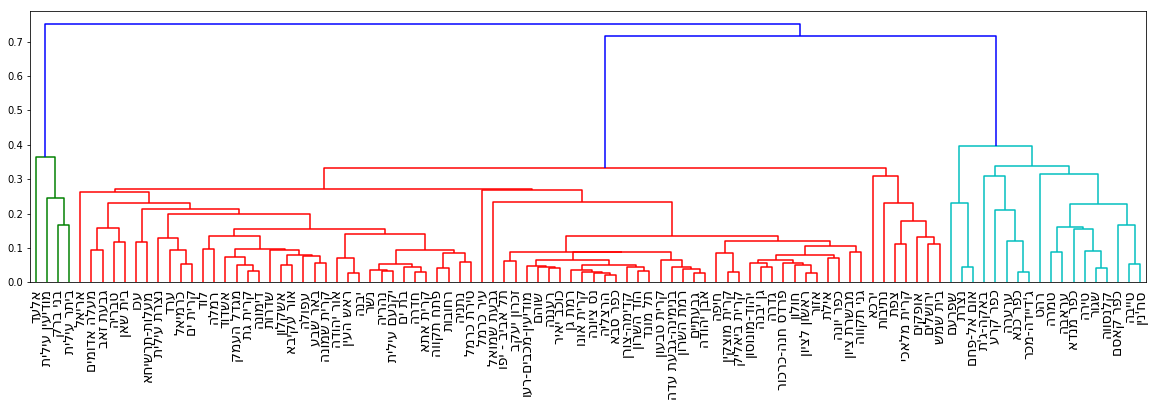

In [19]:
plt.figure(figsize=(20, 5))

# You can experiment with the color threshold to observe the different possible clusterizations:
hierarchy.dendrogram(lnk, labels=labels_r, leaf_font_size=14, color_threshold=0.5);

## Challenge 214
When using our domain expertise regarding the population in Israeli cities and villages, we can cleary conclude from the results that the main "tribes" in our society are Jews and Arabs, where Jews are split according to their religiosity. Although the jingle says "there's no more right or left", your mission, should you choose to accept it, is to find a way to distinguish between right and left.

In [42]:
import xml.etree.ElementTree as ET

tree = ET.parse('yeshuvim_20190301.xml')
root = tree.getroot()

In [56]:
napas = [int(elem.text.strip()) for elem in root.iter() if elem.tag == 'סמל_נפה']
yeshuvs = [elem.text.strip() for elem in root.iter() if elem.tag == 'שם_ישוב']

yeshuvs_napa = {}
for yeshuv, napa in zip(yeshuvs, napas):
    yeshuvs_napa[yeshuv] = napa

In [71]:
df['napa'] = df.TownName.apply(lambda x: yeshuvs_napa[x] if x in yeshuvs_napa else None)
df.sample(10)

,TownNumber,TownName,Potential,TotalVotes,PercentVote,Qualified,Disqualified,Avoda,Or,BaitYehudi,...,Gever,Zomet,Zabar,Daam,AleYarok,Koah.2,Lidar,Yarok,Shas,napa
596,408,נאות מרדכי,459,314,68.41,314,0,128,0,0,...,1,0,0,0,3,0,0,1,2,21.0
857,3599,מחולה,262,200,76.34,199,1,1,0,77,...,0,0,0,0,0,0,0,1,11,75.0
328,739,שדה עוזיהו,752,501,66.62,497,4,29,0,20,...,0,0,0,1,0,0,0,0,104,61.0
824,748,מסלול,308,212,68.83,211,1,50,0,1,...,0,0,0,0,1,0,0,0,20,62.0
1034,3784,שמעה,206,131,63.59,131,0,5,0,0,...,0,0,0,0,0,0,0,0,12,77.0
14,6400,הרצליה,74585,48046,64.42,47558,488,7341,18,903,...,10,10,51,30,219,10,10,255,2170,51.0
775,364,כפר אוריה,317,238,75.08,236,2,46,0,1,...,0,0,1,0,1,0,0,4,10,11.0
656,792,נתיב השיירה,384,283,73.70,280,3,111,1,4,...,0,0,0,0,1,1,0,1,13,24.0
1092,1177,טללים,142,93,65.49,93,0,9,0,15,...,0,0,0,4,0,0,0,0,5,62.0
205,1310,לפיד,1342,1054,78.54,1047,7,168,0,17,...,1,1,1,1,7,0,0,2,19,43.0


In [89]:
yeshuvs_napa

{'רותם': 75,
 'גבעת אלה': 23,
 'ברקאי': 32,
 'מבשרת ציון': 11,
 'קרית שמונה': 21,
 'מגן שאול': 23,
 'תירוש': 11,
 'נווה אור': 23,
 'אביגדור': 61,
 'בית הלוי': 41,
 'מעגן מיכאל': 32,
 'גורן': 24,
 'שעורים': 22,
 'שפר': 21,
 'אשרת': 24,
 'יד השמונה': 11,
 'גבים': 61,
 'פוריה עילית': 22,
 'רמות נפתלי': 21,
 'רחובות': 44,
 'שבי דרום': 62,
 'נווה מיכאל': 11,
 'שומרה': 24,
 'מחנה תל נוף': 44,
 'עין איילה': 32,
 'שער אפרים': 41,
 'מחסיה': 11,
 'כדורי': 22,
 'עראמשה': 24,
 'טירת כרמל': 31,
 'טובא-זנגריה': 21,
 'אבטין': 31,
 'כפר האורנים': 74,
 'שכניה': 24,
 'כנרת )מושבה(': 22,
 'מנות': 24,
 'ביתר עילית': 76,
 'נווה מבטח': 61,
 'ניר עקיבא': 62,
 'שדה ורבורג': 42,
 'רועי': 75,
 'רנן': 62,
 'צור נתן': 42,
 'עין גדי': 62,
 'יערה': 24,
 'תרום': 11,
 'אומץ': 41,
 'כפר סבא': 42,
 'גמזו': 43,
 'גדות': 21,
 'אבנת': 75,
 'משמר דוד': 43,
 'לפידות': 24,
 'זוהר': 61,
 'כחל': 21,
 'זרזיר': 23,
 'צוחר': 62,
 'תלמי יחיאל': 61,
 'שוהם': 43,
 'ניל"י': 74,
 'הגושרים': 21,
 'כרם בן זמרה': 21,
 'בניה': 44,
 'כוכב 

In [87]:
n = 100

x = np.zeros((n, 35))
labels_r = []

valid = 0
for i, row in df.iterrows():
    x[valid] = row[7:]                        
    
    town_name = df.TownName[i]
    
    if town_name not in yeshuvs_napa:
        continue
    
    
    x[valid][34] =  yeshuvs_napa[town_name]
    
    
    labels_r.append(df.TownName[i][::-1])  
    
    valid += 1 
    if valid == 100:
        break 
x = x/(np.sum(x, axis=1).reshape(-1, 1))        

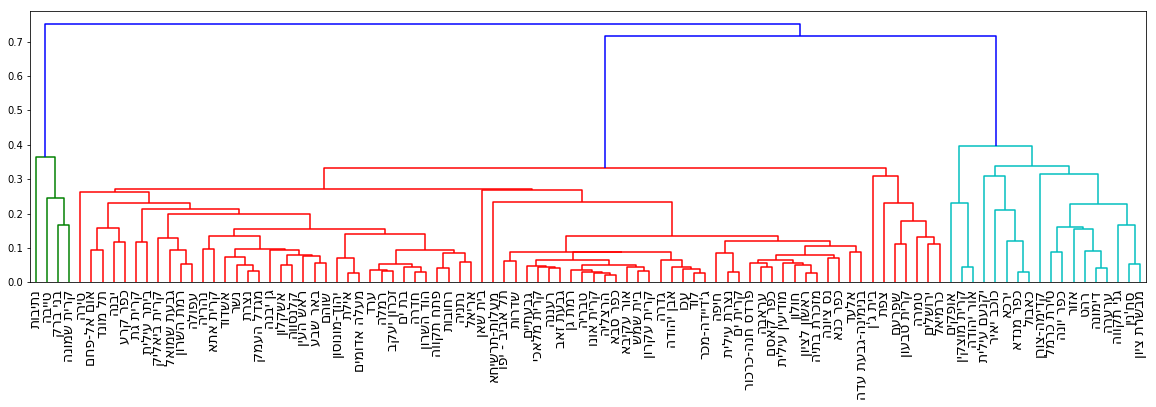

In [88]:
plt.figure(figsize=(20, 5))
hierarchy.dendrogram(lnk, labels=labels_r, leaf_font_size=14, color_threshold=0.5);    




# Good Luck and Enjoy Learning Machine Learning!

